In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
GeoAxes._pcolormesh_patched = Axes.pcolormesh
fname = '/lus/dal/cccr_rnd/manmeet/iccp/data/INDIA.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())


data_dir = '/lus/dal/cccr_rnd/manmeet/iccp/data/era5_1979_2019_day.nc'  # daily

ds_era5 = xr.open_dataset(data_dir)

data_dir = '/lus/dal/cccr_rnd/manmeet/iccp/data/trmm_3b42v7/3b42v7_daily1998_2019.nc'
ds_trmm = xr.open_dataset(data_dir)

data_dir = '/lus/dal/cccr_rnd/manmeet/deepsd/data/prism/ppt/raw/imd-dly-p25-1901-2019.nc'
ds_imd = xr.open_dataset(data_dir)

In [3]:
ds_era5

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 321, longitude: 321, time: 14975)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T11:30:00 ... 2019-12-31T11:30:00
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 109.5 109.75 110.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tclw       (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Feb 04 12:50:24 2020: cdo daysum era5_1979_2019_.nc era...
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

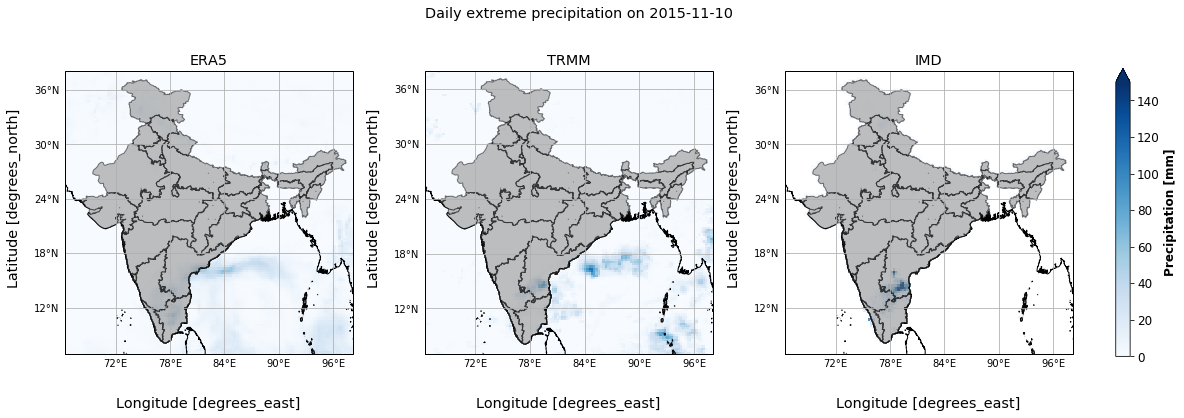

In [2]:
# All India
date = '2015-11-10'
def plot_ai(date):
    size_w, size_h = 0.2, 0.6
    date_o   = datetime.strptime(date, '%Y-%m-%d')
    date_op1 = (date_o + timedelta(days=1))
    date_imd = date_op1.strftime("%Y-%m-%d")
 
    lat_r = slice(7.0,38.0)
    lat_r_= slice(38.0,7.0)
    lon_r = slice(66.5,98.0)

    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_axes([0.15,0.1,size_w,size_h],projection=ccrs.PlateCarree())


    ds_era5_tp = ds_era5.tp.sel(longitude=lon_r, latitude=lat_r_,time=date)*1000
    ds_era5_tp.plot(cmap='Blues',ax=ax1,vmin=0, vmax=150, add_colorbar=False)
    ax1.coastlines(resolution='10m')
    ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),edgecolor='black', facecolor='gray', alpha=0.5)
    ax1.set_title('ERA5', size='x-large')

    ax2 = fig.add_axes([0.4,0.1,size_w,size_h],projection=ccrs.PlateCarree())

    ds_trmm.r.sel(lon=lon_r, lat=lat_r,time=date).plot(cmap='Blues',ax=ax2,vmin=0, vmax=150, add_colorbar=False)
    ax2.coastlines(resolution='10m')
    ax2.add_geometries(adm1_shapes, ccrs.PlateCarree(),edgecolor='black', facecolor='gray', alpha=0.5)
    ax2.set_title('TRMM', size='x-large')

    ax3 = fig.add_axes([0.65,0.1,size_w,size_h],projection=ccrs.PlateCarree())

    im = ds_imd.rf.sel(lon=lon_r, lat=lat_r,time=date_imd).plot(cmap='Blues',ax=ax3, vmin=0, vmax=150, 
                                                       add_colorbar=False)
    ax3.coastlines(resolution='10m')
    ax3.add_geometries(adm1_shapes, ccrs.PlateCarree(),edgecolor='black', facecolor='gray', alpha=0.5)
    ax3.set_title('IMD', size='x-large')


    def prettify(ax):
#ax.text(90, 5, "test", fontsize=12)
        gl = ax.gridlines()
        gl.xlabels_bottom = True
        gl.ylabels_left = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 'medium'}
        gl.ylabel_style = {'size': 'medium'}
        ax.text(-0.15, 0.55,"Latitude [degrees_north]", va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor',
                transform=ax.transAxes, size='x-large')
        ax.text(0.5, -0.2, "Longitude [degrees_east]", va='bottom', ha='center',
                rotation='horizontal', rotation_mode='anchor',
                transform=ax.transAxes, size='x-large')
    
    for ax in [ax1,ax2,ax3]:
        prettify(ax)
    fig.text(0.4, 0.67, "Daily extreme precipitation on "+date, size='x-large')

    cbar_ax = fig.add_axes([0.88, 0.2, 0.01, 0.4])
    cb = fig.colorbar(im, extend='max', cax=cbar_ax)

    cb.set_label(label='Precipitation [mm]', size='large', weight='bold')
    cb.ax.tick_params(labelsize='large')
plot_ai(date)

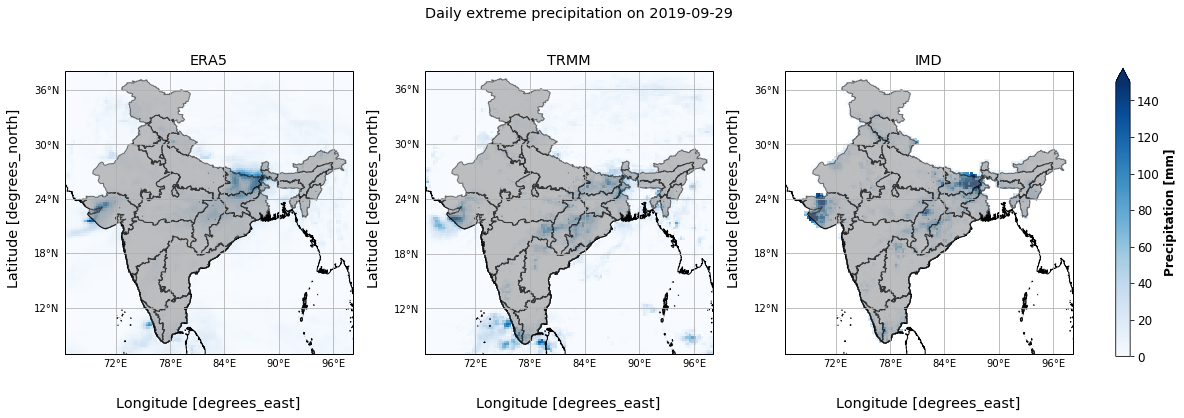

In [4]:
plot_ai('2019-09-29')